# Finding the signal in a noisy haystack using Ridge and Lasso regularized regression
#### Author: Mattias Villani, http://mattiasvillani.com

In [53]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=25) # Set the seed for reproducibility

Let's simulate some regression data from a model with a single important feature. Then we add pNoise additional noise features to the feature set. 
These noise features are unrelated to the response (y) and our hope is that their weights are shrunk toward zero.

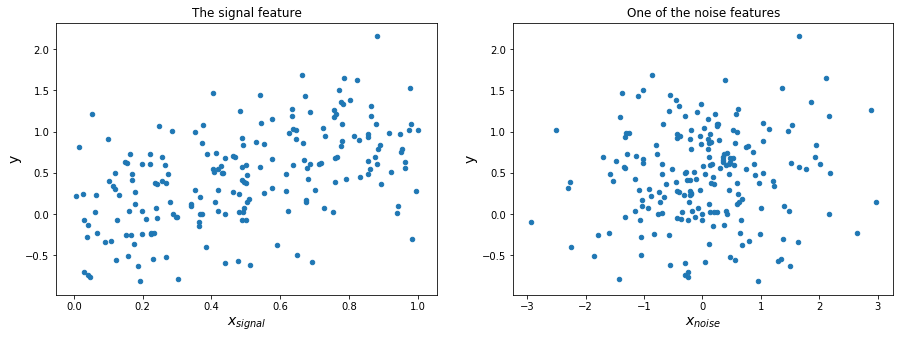

In [77]:
n = 200
pNoise = 20 # How many noise features?
sigmaEps = 0.5
w = np.array([0,1])
xSignal = np.random.uniform(0,1,(n,1))
y = w[0] + w[1]*xSignal+ sigmaEps*np.random.normal(size=(n,1))
xNoise = np.random.normal(size = (n,pNoise))
X = np.hstack([xSignal, xNoise]) 
y = np.ravel(y) # Make it a vector with shape (n,) rather than a 1D matrix of shape (n,1).

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(xSignal,y, s = 20);
plt.xlabel('$x_{signal}$',fontsize = 14);plt.ylabel('y',fontsize = 14);plt.title('The signal feature')

plt.subplot(1,2,2)
plt.scatter(xNoise[:,0],y, s = 20);
plt.xlabel('$x_{noise}$',fontsize = 14);plt.ylabel('y',fontsize = 14);plt.title('One of the noise features');

### Fitting with least squares, lassoCV and ridgeCV

Lasso regularization parameter (multiplied by n/2): 0.27124684928571385
Ridge regularization parameter: 1.9100000000000001


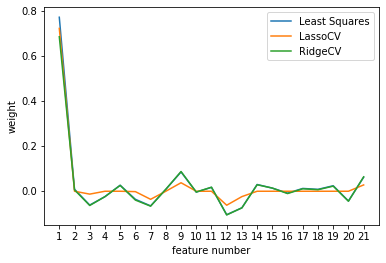

In [55]:
from sklearn import linear_model

# Least squares
regModel = linear_model.LinearRegression()
regModel.fit(X = X, y = y); 
wLS = regModel.coef_

# Lasso CV
regModel = linear_model.LassoLarsCV(cv = 5)
regModel.fit(X = X, y = y); 
wLasso = regModel.coef_
print('Lasso regularization parameter (multiplied by n/2): ' + str((n/2)*regModel.alpha_))

# Ridge CV
regModel = linear_model.RidgeCV(cv = 5, alphas = np.arange(0.01,10,0.1))
regModel.fit(X = X, y = y); 
wRidge = regModel.coef_
print('Ridge regularization parameter: ' + str(regModel.alpha_))

plt.plot(wLS)
plt.plot(wLasso)
plt.plot(wRidge);
plt.ylabel('weight')
plt.xlabel('feature number')
plt.xticks(np.arange(0,X.shape[1]),np.arange(1,X.shape[1]+1))
plt.legend(labels=['Least Squares', 'LassoCV', 'RidgeCV'], loc = 'upper right', fontsize = 10);
#(X.T@X)[0,0]

Note that:

* RidgeCV has very strange default values for alphas (the grid of alpha values tried in the CV. I would not use the defaults 
for that function).
* LassoLarsCV has better defaults through the input argument max_n_alphas.
* The scaling of the objective are different in the RidgeCV and LassoLarsCV implementations. 
    Hence the very different scales for the optimal alpha. In the printout I have multiplied Lassos regularization parameter 
    by n/2 to get them on the same scale that I use in my slides.

### Plotting the average crossvalidated CV over the folds against Lasso's alpha hyperparameter

In [68]:
# Refitting the LassoLarsCV
regModel = linear_model.LassoLarsCV(cv = 5)
regModel.fit(X = X, y = y); 
wLasso = regModel.coef_
print('Lasso regularization parameter (multiplied by n/2): ' + str((n/2)*regModel.alpha_))

Lasso regularization parameter (multiplied by n/2): 0.27124684928571385


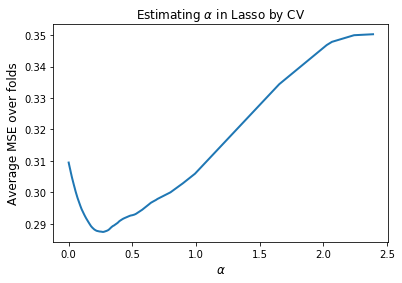

In [78]:
plt.plot((n/2)*regModel.cv_alphas_,np.mean(regModel.mse_path_,axis = 1), linewidth = 2)
plt.xlabel('$\\alpha$', fontsize = 12)
plt.ylabel('Average MSE over folds', fontsize = 12)
plt.title('Estimating $\\alpha$ in Lasso by CV', fontsize = 12);
#plt.savefig('LassoCV.pdf')